In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('movie_metadata.csv')

In [10]:
df.insert(0, "ID", range(1, len(df) + 1))

In [11]:
print(df.head())

   ID  color      director_name  num_critic_for_reviews  duration  \
0   1  Color      James Cameron                   723.0     178.0   
1   2  Color     Gore Verbinski                   302.0     169.0   
2   3  Color         Sam Mendes                   602.0     148.0   
3   4  Color  Christopher Nolan                   813.0     164.0   
4   5    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross  ... num_user_for_reviews language  \
0                  1000.0  760505847.0  ...               3054.0  English  

In [12]:
df = df[['ID', 'movie_title', 'genres', 'plot_keywords'] + 
        [col for col in df.columns if col not in 
         ['ID', 'movie_title', 'genres', 'plot_keywords']]]

In [13]:
print(df.head())

   ID                                        movie_title  \
0   1                                            Avatar    
1   2          Pirates of the Caribbean: At World's End    
2   3                                           Spectre    
3   4                             The Dark Knight Rises    
4   5  Star Wars: Episode VII - The Force Awakens    ...   

                            genres  \
0  Action|Adventure|Fantasy|Sci-Fi   
1         Action|Adventure|Fantasy   
2        Action|Adventure|Thriller   
3                  Action|Thriller   
4                      Documentary   

                                       plot_keywords  color  \
0             avatar|future|marine|native|paraplegic  Color   
1  goddess|marriage ceremony|marriage proposal|pi...  Color   
2                bomb|espionage|sequel|spy|terrorist  Color   
3  deception|imprisonment|lawlessness|police offi...  Color   
4                                                NaN    NaN   

       director_name  num_criti

In [14]:
df.to_csv('movie_metadata_con_ID_y_reorganizado.csv', index=False)

In [20]:
#Reemplazo barras verticales por espacios
df['genres'] = df['genres'].str.replace('|', ' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')

In [23]:
#Junto dos columnas
df['texto'] = df[['genres', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [25]:
df = df[['ID', 'movie_title', 'texto', 'genres', 'plot_keywords'] + 
        [col for col in df.columns if col not in 
         ['ID', 'movie_title', 'texto', 'genres', 'plot_keywords']]]

In [26]:
df.to_csv('movie_metadata_con_ID_y_reorganizado.csv', index=False)

In [28]:
#Importamos librerías sklearn:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

#Creamos un objeto tfidf que nos servirá para vectorizar con el método TF-IDF
tfidf = TfidfVectorizer(max_features = 2000)

'''
El vectorizador TF-IDF se utiliza para convertir una colección de documentos 
de texto en una matriz de términos de documento, donde cada fila representa un 
documento y cada columna representa un término, mientras que los valores en la 
matriz representan la importancia de cada término en cada documento en función 
de la frecuencia de términos en el documento y en la colección completa.
'''

In [29]:
x = tfidf.fit_transform(df['texto'])

In [30]:
#Generamos un mapeo de las películas:

peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas.index = peliculas.index.str.strip()

In [36]:
#Ejemplo consulta:

indice = peliculas['The Dark Knight Rises']

consulta = x[indice]
print(consulta)
consulta.toarray()

  (0, 1349)	0.4327039179793776
  (0, 1245)	0.3738571275391204
  (0, 1356)	0.26474173139625884
  (0, 886)	0.48056667678675813
  (0, 478)	0.46014136234826947
  (0, 1782)	0.3445459446502384
  (0, 1797)	0.1379495887811173
  (0, 32)	0.14997860517223982


array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
#similitud es un arreglo que chequea para la consulta con índice 3, la similitud
#por a través del coseno con todos los textos guardados en x. 
#busca el índice a través de la serie "peliculas" que creamos antes. 

similitud = cosine_similarity(consulta, x)
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]])

In [40]:
#lo aplanamos para no tener que andar poniendo similitud[0][3]
similitud = similitud.flatten()

#vemos la similitud en 3 (que es la misma película, y da uno, 
#cosa que tiene sentido)
similitud[3]

1.0000000000000002

In [41]:
import matplotlib.pyplot as plt

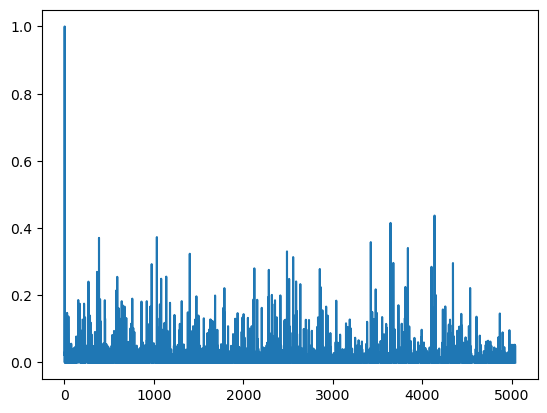

In [42]:
plt.plot(similitud)

In [46]:
#Ordenamos el arreglo similitud para verlo en orden descendente

(-similitud).argsort()

array([   3, 4139, 3647, ..., 2380, 2363, 5042], dtype=int64)

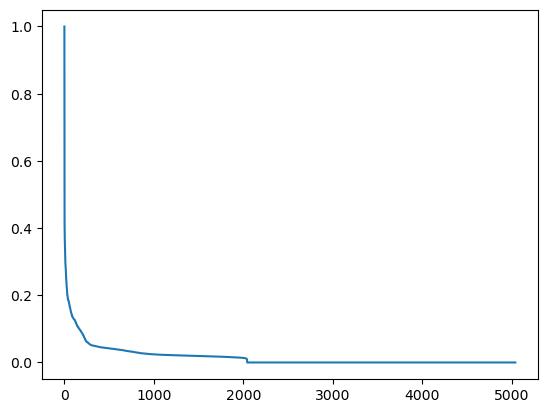

In [47]:
plt.plot(similitud[(-similitud).argsort()])

In [48]:
recomendacion = (-similitud).argsort()[1:11]

In [49]:
df['movie_title'].iloc[recomendacion]

4139            AWOL-72 
3647           Deadfall 
1034            The One 
387     The Devil's Own 
3426            Swelter 
3841     Police Academy 
2489      Let's Be Cops 
1402    Lethal Weapon 3 
2558           Hot Fuzz 
3678     Mambo Italiano 
Name: movie_title, dtype: object